In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/paper classification/'

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

train = pd.read_csv( path +'Train.csv')

train.head()


,id,ABSTRACT,Computer Science,Mathematics,Physics,Statistics,Analysis of PDEs,Applications,Artificial Intelligence,Astrophysics of Galaxies,...,Methodology,Number Theory,Optimization and Control,Representation Theory,Robotics,Social and Information Networks,Statistics Theory,Strongly Correlated Electrons,Superconductivity,Systems and Control
0,1824,a ever-growing datasets inside observational a...,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3094,we propose the framework considering optimal $...,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8463,nanostructures with open shell transition meta...,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2082,stars are self-gravitating fluids inside which...,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8687,deep neural perception and control networks ar...,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
test = pd.read_csv( path+'Test.csv')
test.head()

,id,ABSTRACT,Computer Science,Mathematics,Physics,Statistics
0,9409,fundamental frequency (f0) approximation from ...,0,0,0,1
1,17934,"this large-scale study, consisting of 24.5 mil...",1,0,0,1
2,16071,we present a stability analysis of the plane c...,0,0,1,0
3,16870,we construct finite time blow-up solutions to ...,0,1,0,0
4,10496,planetary nebulae (pne) constitute an importan...,0,0,1,0


In [ ]:
ID_COL = 'id'

TARGET_COLS = ['Analysis of PDEs', 'Applications',
               'Artificial Intelligence', 'Astrophysics of Galaxies',
               'Computation and Language', 'Computer Vision and Pattern Recognition',
               'Cosmology and Nongalactic Astrophysics',
               'Data Structures and Algorithms', 'Differential Geometry',
               'Earth and Planetary Astrophysics', 'Fluid Dynamics',
               'Information Theory', 'Instrumentation and Methods for Astrophysics',
               'Machine Learning', 'Materials Science', 'Methodology', 'Number Theory',
               'Optimization and Control', 'Representation Theory', 'Robotics',
               'Social and Information Networks', 'Statistics Theory',
               'Strongly Correlated Electrons', 'Superconductivity',
               'Systems and Control']

TOPIC_COLS = ['Computer Science', 'Mathematics', 'Physics', 'Statistics']

print(f'\n Train contains {train.shape[0]} samples and {train.shape[1]} variables')
print(f'\n Test contains {test.shape[0]} samples and {test.shape[1]} variables')
print(f'\n Number of distinct SUB TOPICS is {len(TARGET_COLS)}')

features = [c for c in train.columns if c not in [ID_COL] + TARGET_COLS]
print(f'\n The dataset contains {len(features)} features')


 Train contains 14004 samples and 31 variables

 Test contains 6002 samples and 6 variables

 Number of distinct SUB TOPICS is 25

 The dataset contains 5 features


In [ ]:
multi_class_train_df = train.drop(TARGET_COLS, axis =1)
multi_class_train_df = multi_class_train_df.drop(ID_COL, axis =1)
multi_class_test_df = test.drop(['id'], axis =1)
df = multi_class_train_df.append(multi_class_test_df)
df = df.sample(frac=1, random_state=42).reset_index(drop=True)
print(df.columns)
df.head()
df_train = df

Index(['ABSTRACT', 'Computer Science', 'Mathematics', 'Physics', 'Statistics'], dtype='object')


In [ ]:
df.loc[(df['Computer Science']==1)
               , 'label'] = 'Computer Science'

df.loc[(df['Mathematics']==1)
               , 'label'] = 'Mathematics'


df.loc[(df['Physics']==1)
               , 'label'] = 'Physics'
               
df.loc[(df['Statistics']==1)
               , 'label'] = 'Statistics'  

df.head()

,ABSTRACT,Computer Science,Mathematics,Physics,Statistics,label
0,low radio frequency surveys are important cons...,0,0,1,0,Physics
1,high-mass stars have generally been assumed to...,0,0,1,0,Physics
2,an algorithm considering solving smooth noncon...,0,1,0,0,Mathematics
3,smart active particles should acquire some lim...,1,0,1,0,Physics
4,we consider a fundamental problem of construct...,1,0,0,0,Computer Science


In [ ]:
df = df.drop(['Computer Science','Mathematics','Physics','Statistics'], axis = 1)
df.head()

,ABSTRACT,label
0,low radio frequency surveys are important cons...,Physics
1,high-mass stars have generally been assumed to...,Physics
2,an algorithm considering solving smooth noncon...,Mathematics
3,smart active particles should acquire some lim...,Physics
4,we consider a fundamental problem of construct...,Computer Science


In [ ]:
df.shape

(20006, 2)

In [ ]:
vc=df['label'].value_counts()
vc

Computer Science    5971
Statistics          5454
Physics             5448
Mathematics         3133
Name: label, dtype: int64

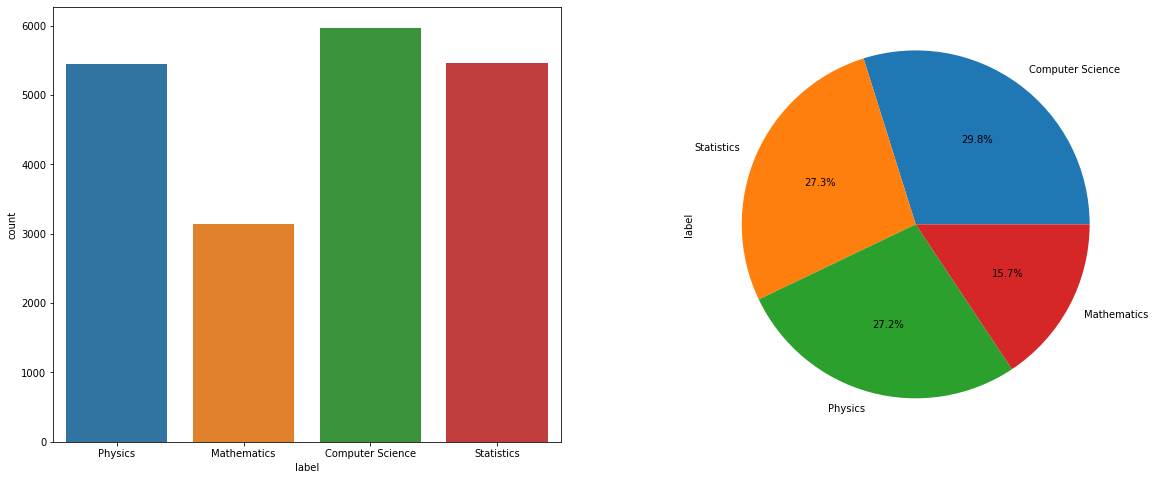

In [ ]:
fig, ax=plt.subplots(1,2,figsize=(20,8))
_ = sns.countplot(x='label', data=df, ax=ax[0])
_ = df['label'].value_counts().plot.pie(autopct="%1.1f%%", ax=ax[1])


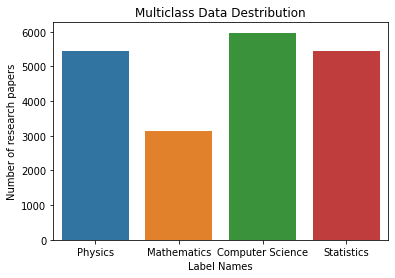

In [ ]:
sns.countplot(x='label', data=df)

plt.title("Multiclass Data Destribution")
plt.xlabel("Label Names")
plt.ylabel("Number of research papers");

In [ ]:
df_train.head()

,ABSTRACT,Computer Science,Mathematics,Physics,Statistics,label
0,low radio frequency surveys are important cons...,0,0,1,0,Physics
1,high-mass stars have generally been assumed to...,0,0,1,0,Physics
2,an algorithm considering solving smooth noncon...,0,1,0,0,Mathematics
3,smart active particles should acquire some lim...,1,0,1,0,Physics
4,we consider a fundamental problem of construct...,1,0,0,0,Computer Science


In [ ]:
df_train = df_train.drop(['label'], axis = 1)
df_train.columns

Index(['ABSTRACT', 'Computer Science', 'Mathematics', 'Physics', 'Statistics'], dtype='object')

In [ ]:
categories = list(df_train.columns.values)
categories = categories[1:]
print(categories)

['Computer Science', 'Mathematics', 'Physics', 'Statistics']


In [ ]:
sns.set(font_scale = 2)
plt.figure(figsize=(15,8))

ax= sns.barplot(categories, df_train.iloc[:,1:].sum().values)

plt.title("Comments in each category", fontsize=20)
plt.ylabel('Number of comments', fontsize=18)
plt.xlabel('Research Label', fontsize=18)
plt.tick_params(axis='x',rotation=0,labelsize=12)

#adding the text labels
rects = ax.patches
labels = df.iloc[:,1:].sum().values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom', fontsize=18);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


ValueError: ignored

<Figure size 1080x576 with 1 Axes>

In [ ]:
df_train.head()

,ABSTRACT,Computer Science,Mathematics,Physics,Statistics
0,low radio frequency surveys are important cons...,0,0,1,0
1,high-mass stars have generally been assumed to...,0,0,1,0
2,an algorithm considering solving smooth noncon...,0,1,0,0
3,smart active particles should acquire some lim...,1,0,1,0
4,we consider a fundamental problem of construct...,1,0,0,0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  This is separate from the ipykernel package so we can avoid doing imports until


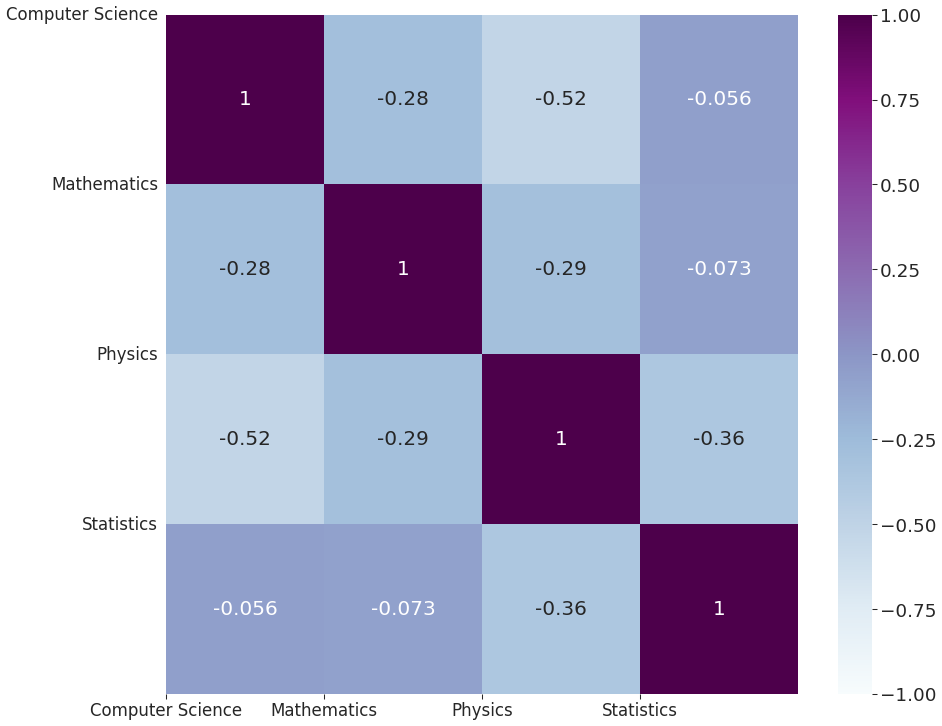

In [ ]:
def plotCorrelationMatrix(df, graphWidth):
  
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth+2, graphWidth), dpi=60, facecolor='W', edgecolor='b')
    corrMat = sns.heatmap(corr, vmin=-1, vmax=1,cmap="BuPu", annot=True)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=00, fontsize=20,weight = 'bold')
    plt.yticks(range(len(corr.columns)), corr.columns, rotation=00, fontsize=20,weight = 'bold')
    plt.gca().xaxis.tick_bottom()
    #plt.title(f'Correlation Matrix between Multi-class labels', fontsize=25)
    plt.show()

cor_train = df_train.drop('ABSTRACT', axis =1)
#cor_train = cor_train.drop(TARGET_COLS, axis =1)
plotCorrelationMatrix(cor_train, 15)